## Seaborn

**`seaborn`** es una librería de visualización de datos para python desarrollada sobre **`matplotlib`**. Ofrece una interfaz de alto nivel para la creación de gráficas. Además, está integrada con las estructuras de datos de **`pandas`**, lo que permite utilizar el nombre de los **`DataFrames`** y campos directamente como argumentos de las funciones de visualización.


|Función                | Plot                                                                                                                                  |
|-----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
|**`sns.pairplot()`**   | Crea una matriz de graficas, en la diagonal aparece el **`histograma`** y en los demás una gráfica de **`dispersión`**.              |
|**`sns.barplot()`**    | Crea un gráfico de barras con el promedio de los valores.                                                                            |
|**`sns.countplot()`**  | Crea un grafico de barras con el conteo de cada categoria.                                                                            |
|**`sns.histplot()`**   | Crea un histograma.                                                                                                                  |
|**`sns.scatterplot()`**| Crea un scatterplot.                                                                                                                  |
|**`sns.jointplot()`**  | Crea graficos de dispersión con histogramas.                                                                                          |
|**`sns.kdeplot()`**    | Crea graficos de densidad de probabilidad de la curva continua de los datos.                                                          |
|**`sns.boxplot()`**    | Crea graficos de caja.                                                                                                                |
|**`sns.violinplot()`** | Crea graficos de violin.                                                                                                            |
|**`sns.heatmap()`**    | Crea mapas de calor.                                                                                                                  |
|**`sns.FacetGrid()`**  | Genera una matriz de graficas filtrando por las columnas y filas del **`DataFrame`** y aplicando una misma grafica a toda la matriz.|

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_excel("data/Airbnb_NYC.xlsx", sheet_name = "NYC1")
df2 = pd.read_excel("data/Airbnb_NYC.xlsx", sheet_name = "NYC2")

df = pd.merge(right = df1, left = df2, right_on = "id", left_on = "id")

df.head(3)

,id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type
0,2539.0,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,2595.0,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,3647.0,150.0,3.0,0.0,NaT,NaN,1.0,365.0,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room


In [3]:
df.shape

(48895, 16)

In [4]:
df = df.sort_values("price").iloc[1000:20000][["host_id", "municipio", "number_of_reviews", "reviews_per_month", "price", "room_type"]]

df.head(3)

,host_id,municipio,number_of_reviews,reviews_per_month,price,room_type
3014,173997,Brooklyn,3.0,0.12,35.0,Private room
38448,201015598,Brooklyn,11.0,1.51,35.0,Shared room
31446,28046572,Brooklyn,1.0,0.08,35.0,Private room


In [12]:
df.shape

(19000, 6)

Desde la propia librería podemos cargar datasets que vienen ya precargados.
Listado de datasets. https://github.com/mwaskom/seaborn-data

In [5]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### sns.pairplot()

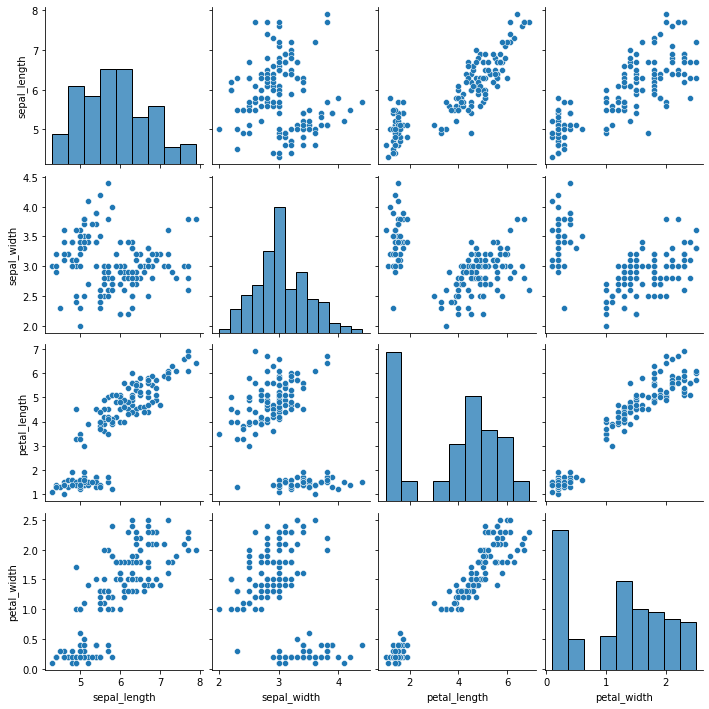

In [7]:
sns.pairplot(iris)
plt.show()

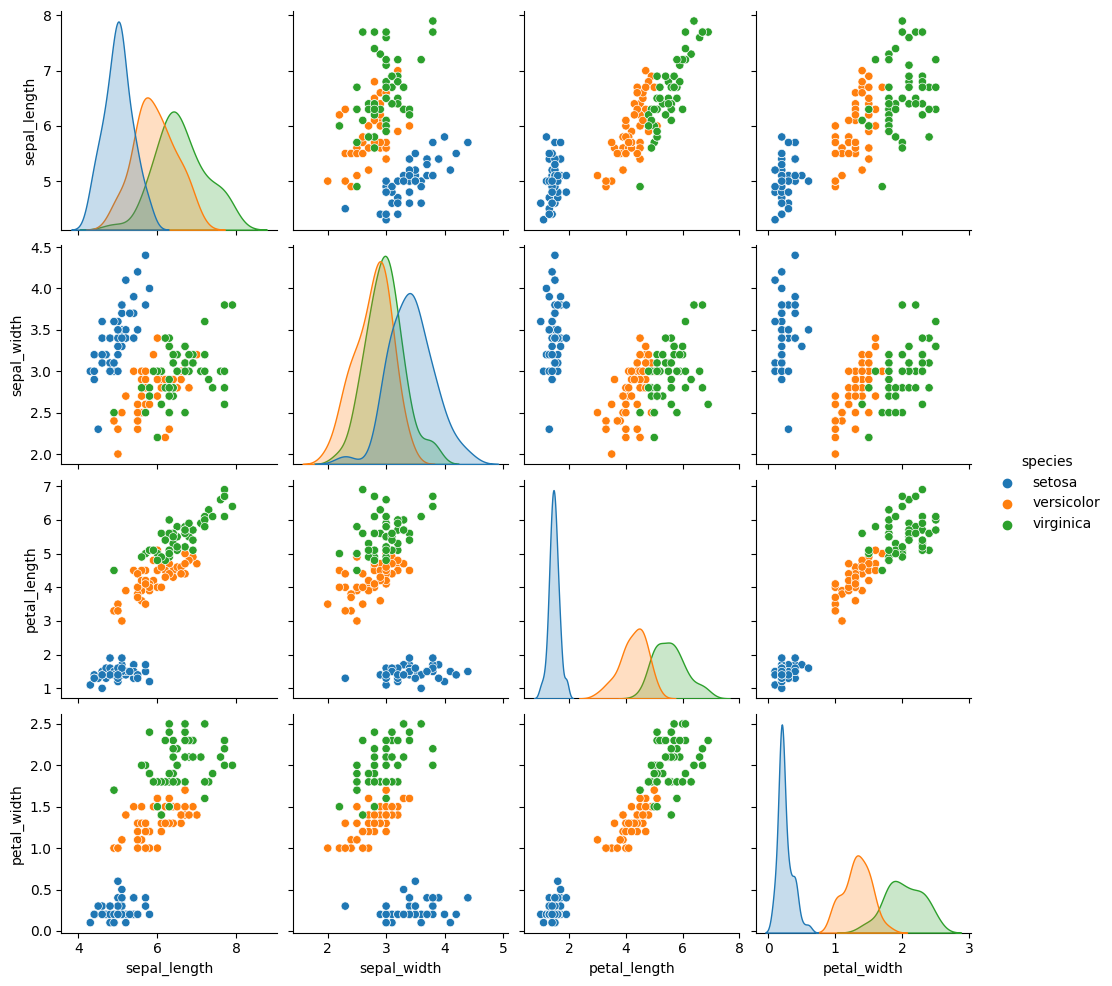

In [8]:
# Con la parámetro "hue" podemos ver cada categoría por color 

sns.pairplot(data = iris, hue = "species")
plt.show()

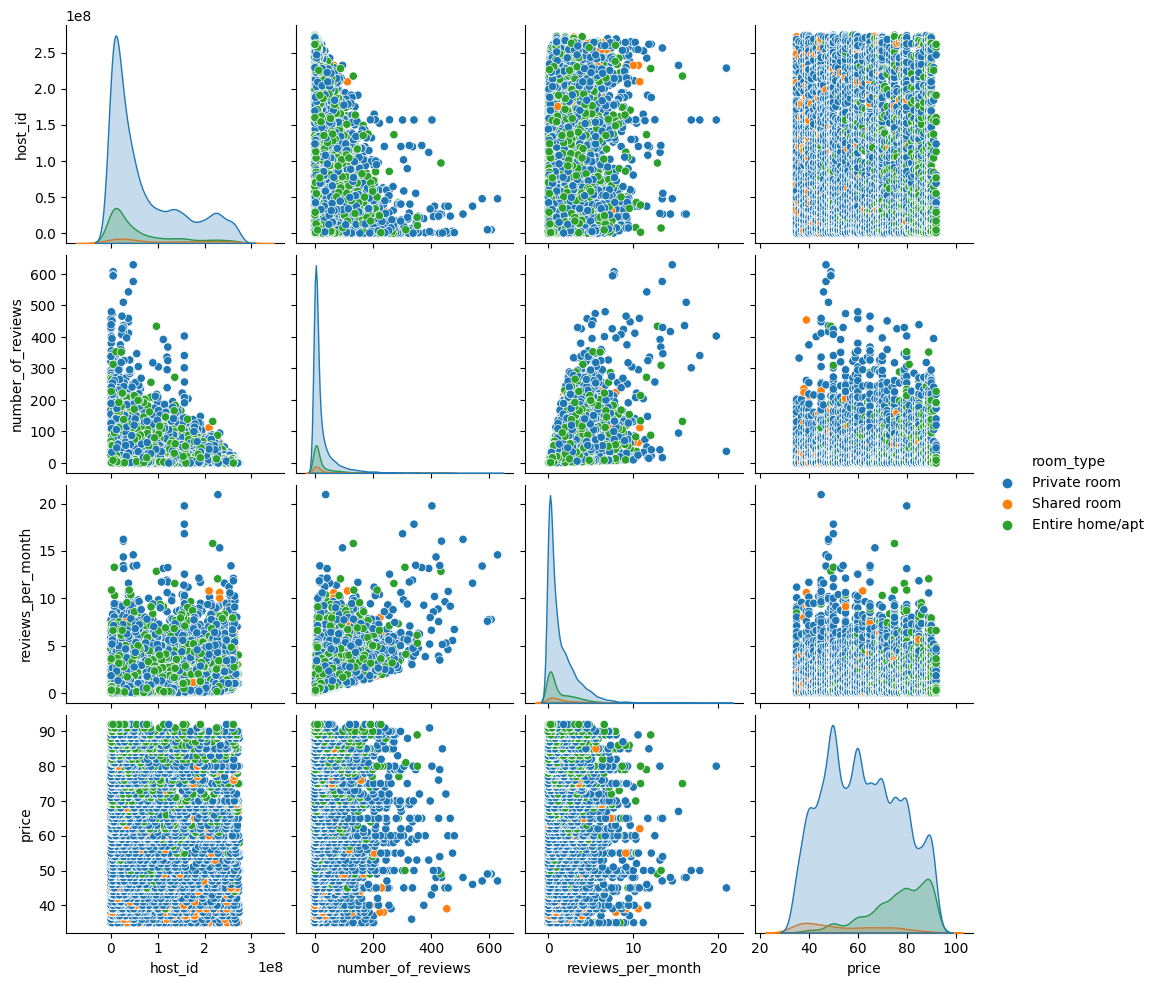

In [9]:
sns.pairplot(df, hue = "room_type") 
plt.show()

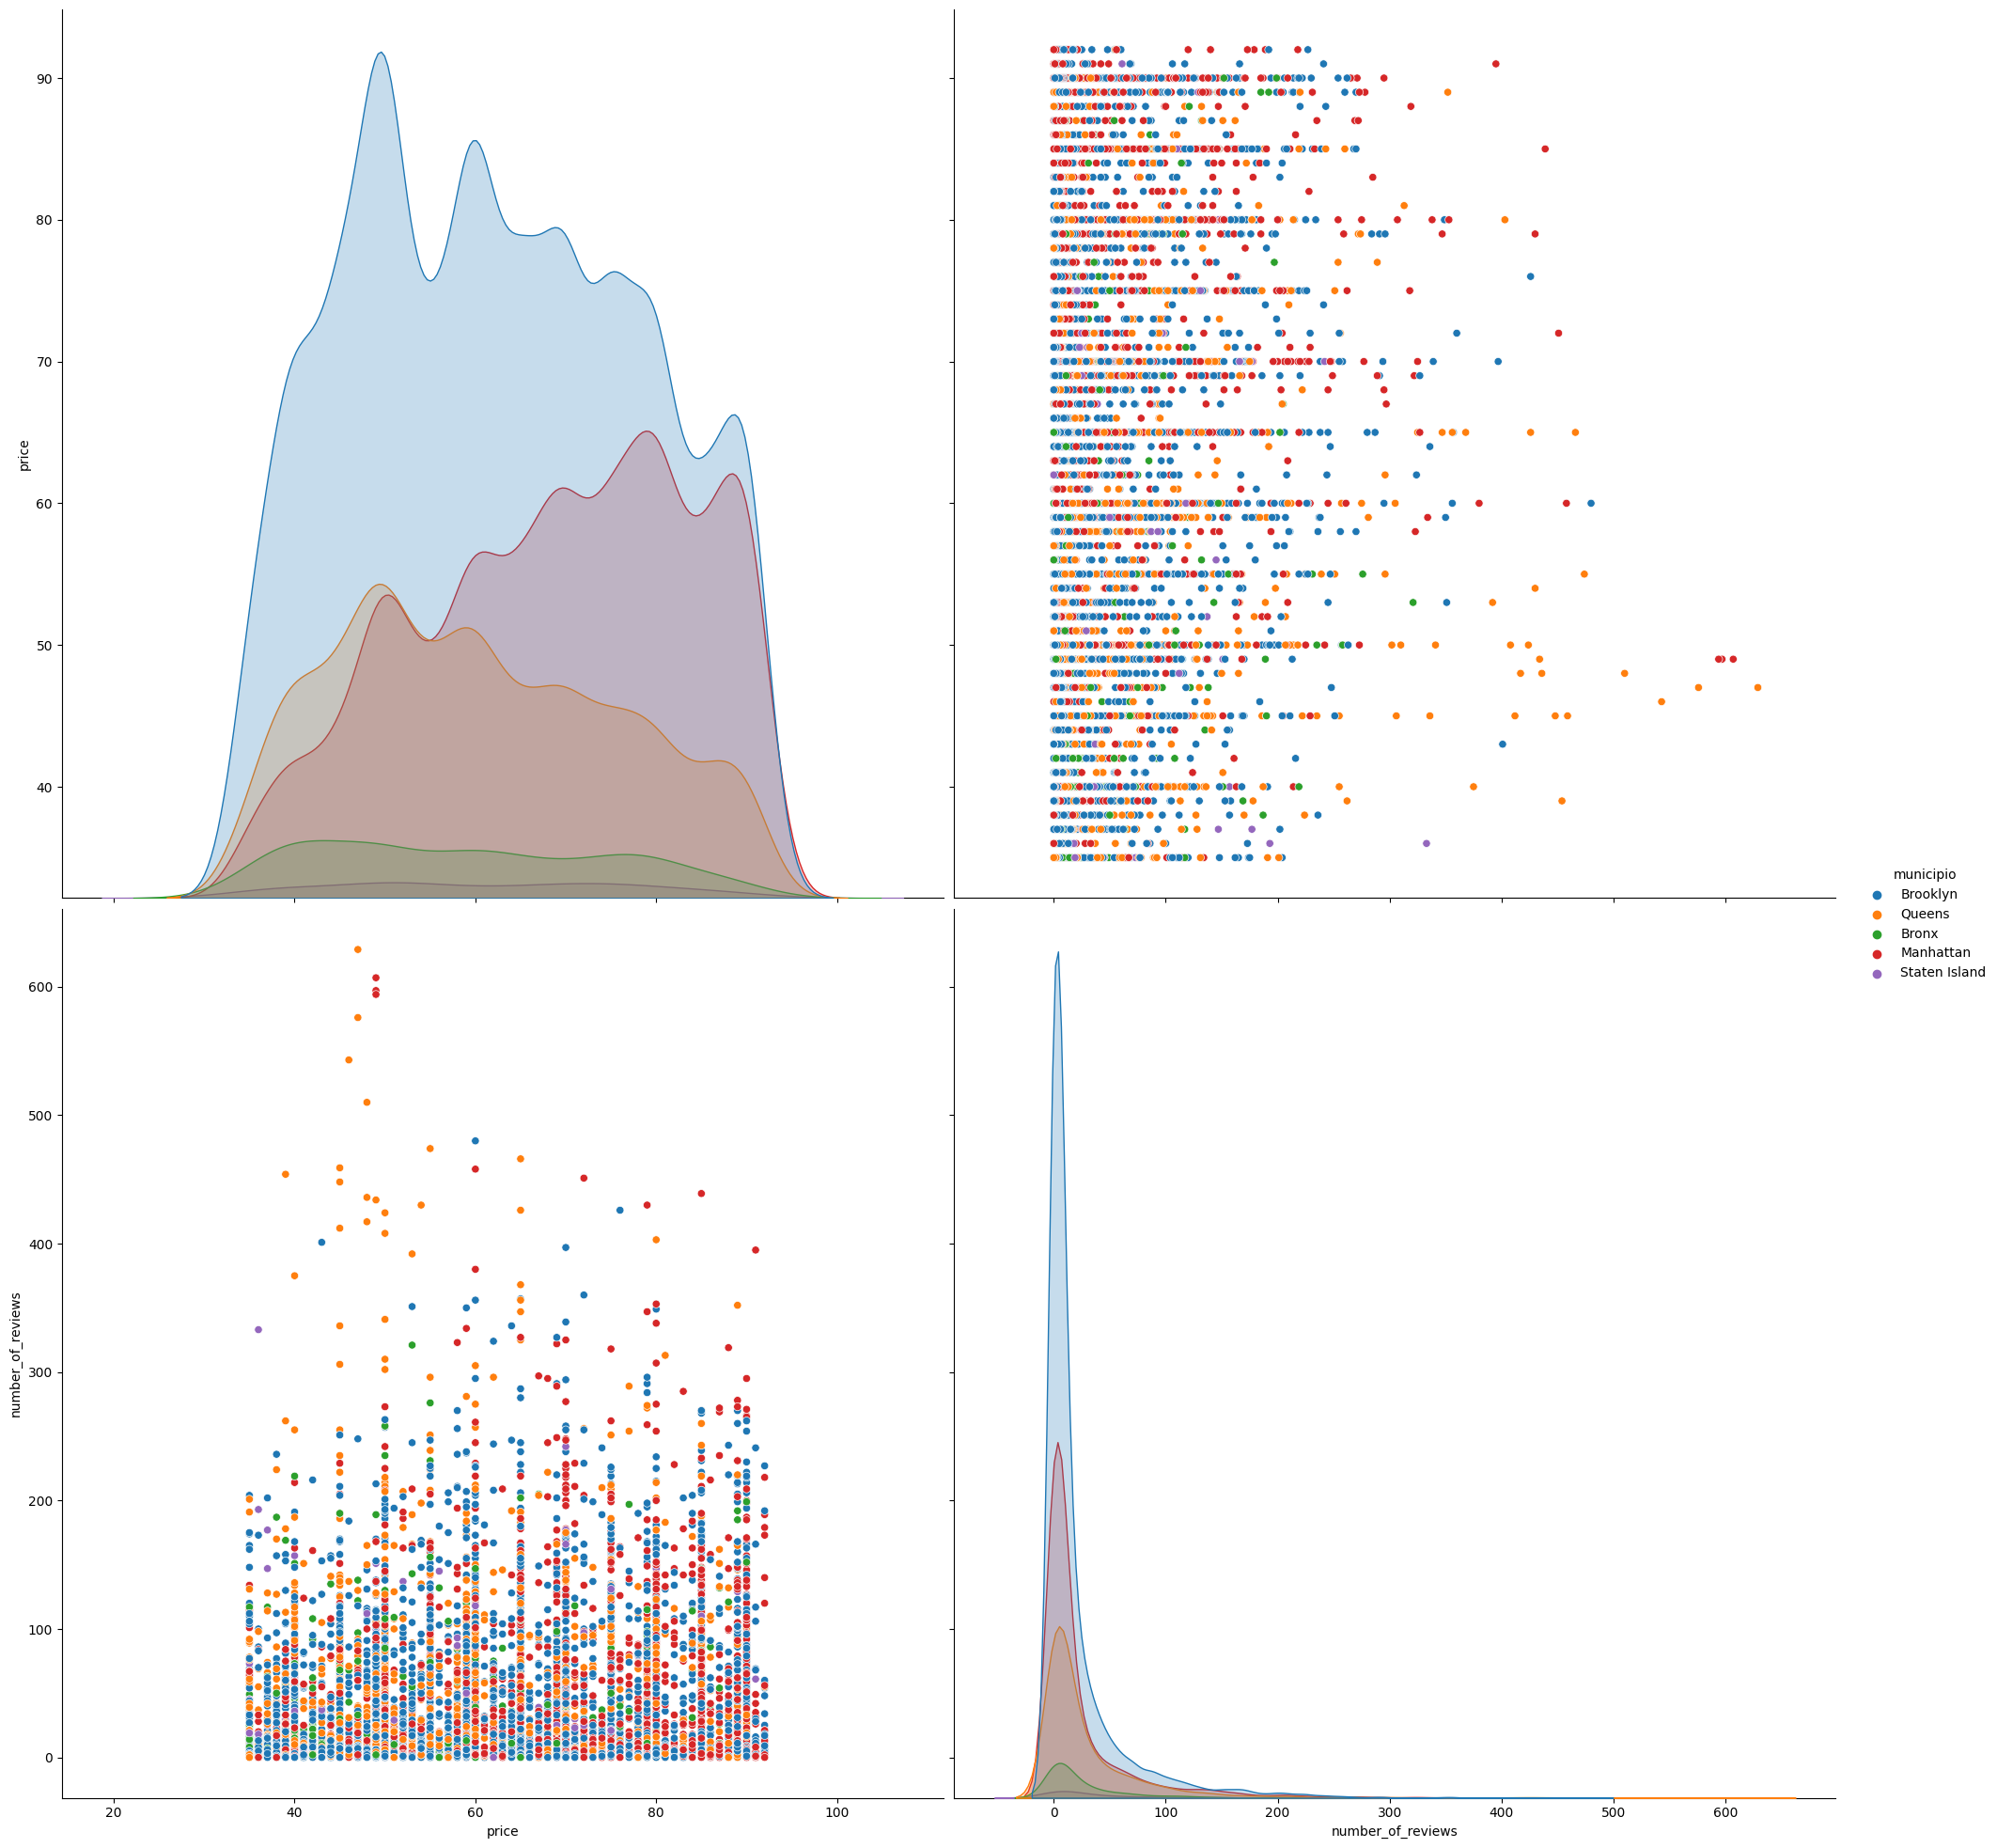

In [11]:
# Con "vars" podemos elegir cuales columnas mostrar
# Con "height" podemos modificar el tamaño de las graficas

sns.pairplot(df, vars = ["price", "number_of_reviews"], height = 10, hue = "municipio")
plt.show()

### sns.barplot()

In [21]:
df.groupby("room_type", as_index = False)["price"].mean()

,room_type,price
0,Entire home/apt,76.311848
1,Private room,61.800000
2,Shared room,54.642643


In [22]:
df.groupby("room_type", as_index = False)["price"].std()

,room_type,price
0,Entire home/apt,12.203120
1,Private room,15.343195
2,Shared room,15.899730


In [29]:
df.groupby("room_type", as_index = False)["price"].std()['price'].to_list()

[12.203119781505913, 15.343195125335006, 15.899730406233312]

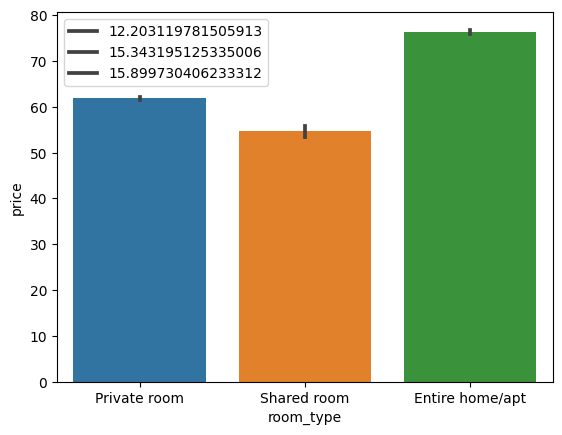

In [32]:
# Muestra el promedio del precio del tipo de habitación

sns.barplot(x = "room_type", y = "price", data = df )
plt.legend(labels = df.groupby("room_type", as_index = False)["price"].std()['price'].to_list())
plt.show()

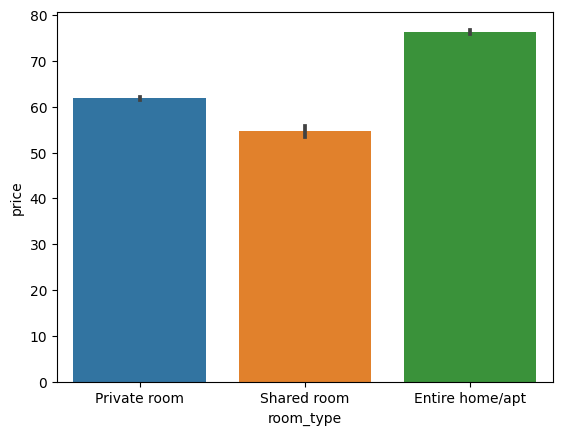

In [33]:
# Otra forma de usar los parámetros

sns.barplot(x = df["room_type"], y = df["price"])
plt.show()

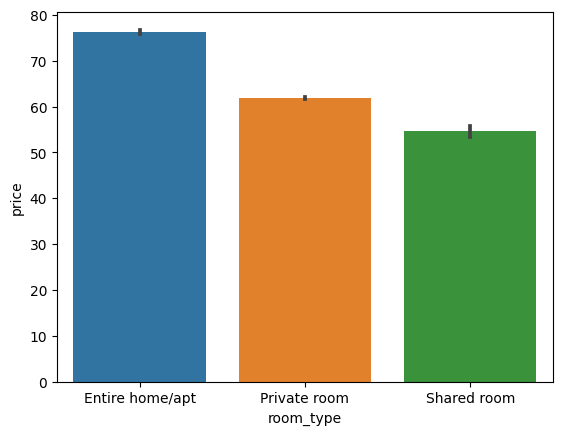

In [34]:
# Con "order" podemos elegir el orden en el que aparecen

sns.barplot(x = "room_type", y = "price", data = df, order = ["Entire home/apt", "Private room", "Shared room"]) 
plt.show()

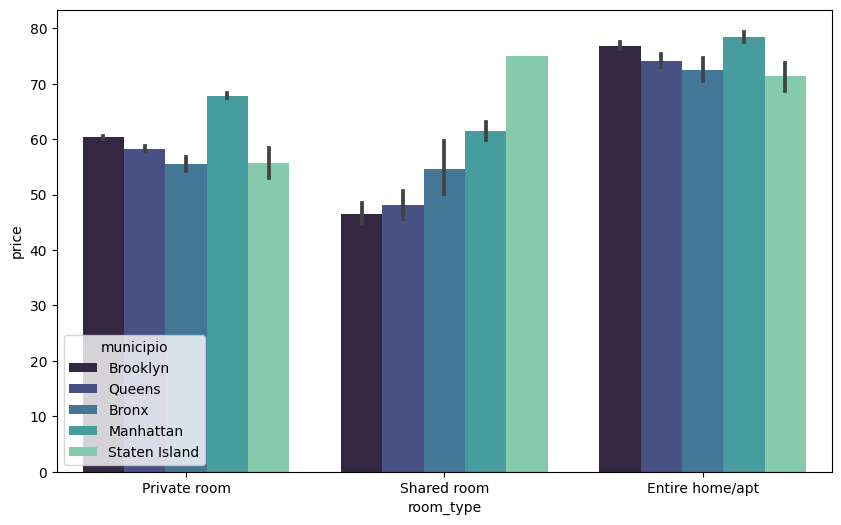

In [41]:
plt.figure(figsize = (10, 6))

sns.barplot(x = "room_type", y = "price", hue = "municipio", data = df, palette = "mako")

plt.show()

### Stacked o apiladas 

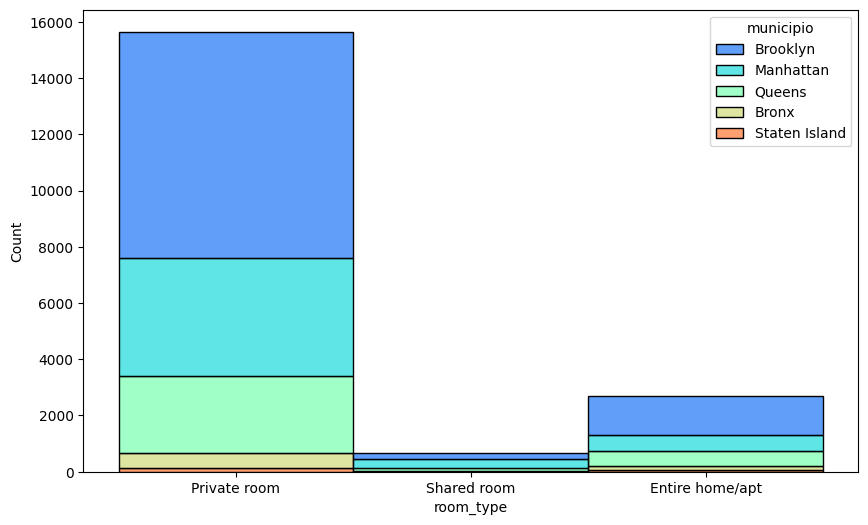

In [47]:
plt.figure(figsize = (10, 6))

sns.histplot(
    x         = "room_type", 
    hue       = "municipio",
    hue_order = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
    data      = df, 
    palette   = "rainbow",
    multiple  = 'stack'
)

plt.show()

In [48]:
df.groupby(["room_type", "municipio"], as_index = False)["price"].mean()

,room_type,municipio,price
0,Entire home/apt,Bronx,72.567568
1,Entire home/apt,Brooklyn,76.848752
2,Entire home/apt,Manhattan,78.469178
3,Entire home/apt,Queens,74.201149
4,Entire home/apt,Staten Island,71.382353
5,Private room,Bronx,55.512334
6,Private room,Brooklyn,60.334533
7,Private room,Manhattan,67.885332
8,Private room,Queens,58.328597
9,Private room,Staten Island,55.631579


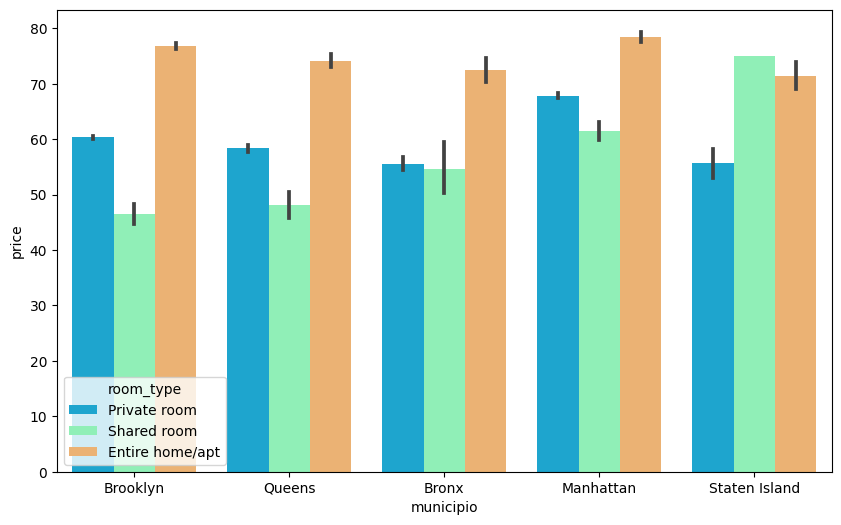

In [54]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "municipio", y = "price", hue = "room_type", data = df, palette = "rainbow")
plt.show()

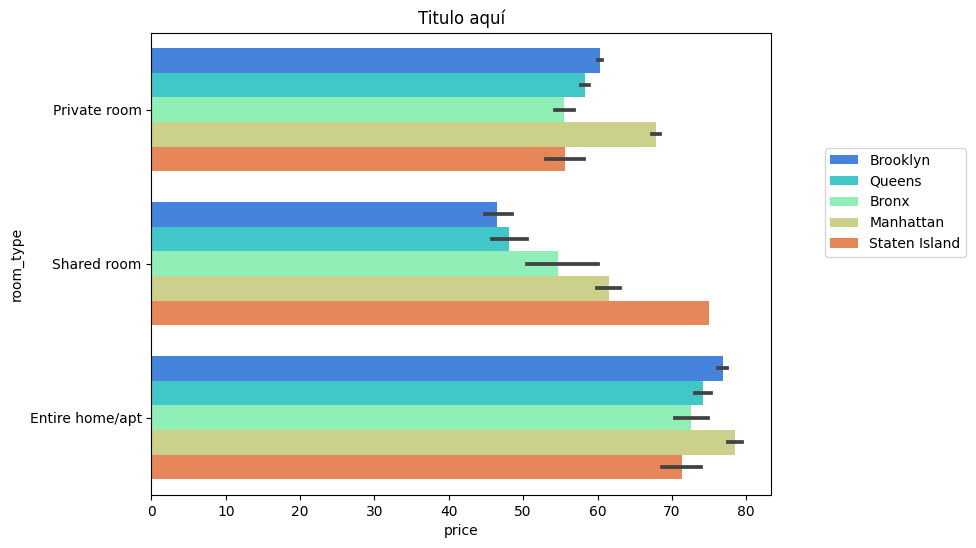

In [70]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "price", y = "room_type", hue = "municipio", data = df, palette = "rainbow")
plt.title('Titulo aquí')
plt.legend(loc='lower center', bbox_to_anchor = (1.2,0.5)) # para sacar la leyenda fuera del gráfico
plt.show()

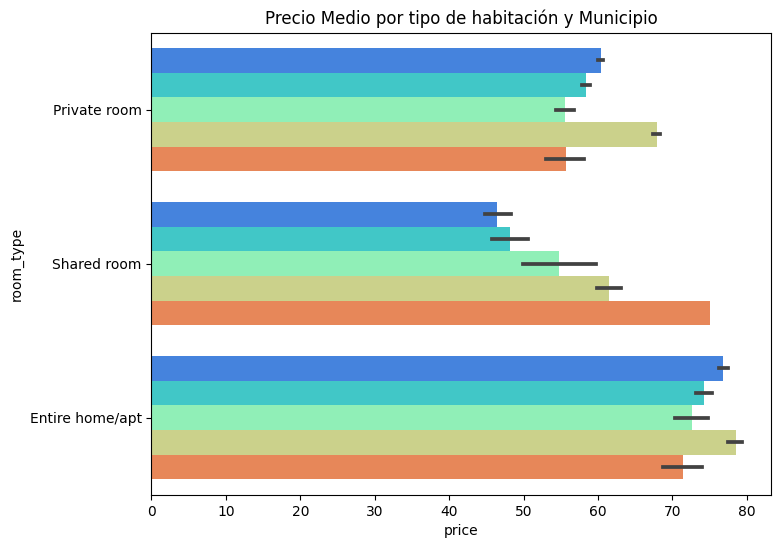

In [56]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "price", y = "room_type", hue = "municipio", data = df, palette = "rainbow")

ax.legend_.remove()
plt.title('Precio Medio por tipo de habitación y Municipio')
plt.show()

### sns.countplot()

**`sns.countplot()`** es la función **`plt.bar()`** de **`matplotlib`**.

In [57]:
df["room_type"].value_counts()

Private room       15650
Entire home/apt     2684
Shared room          666
Name: room_type, dtype: int64

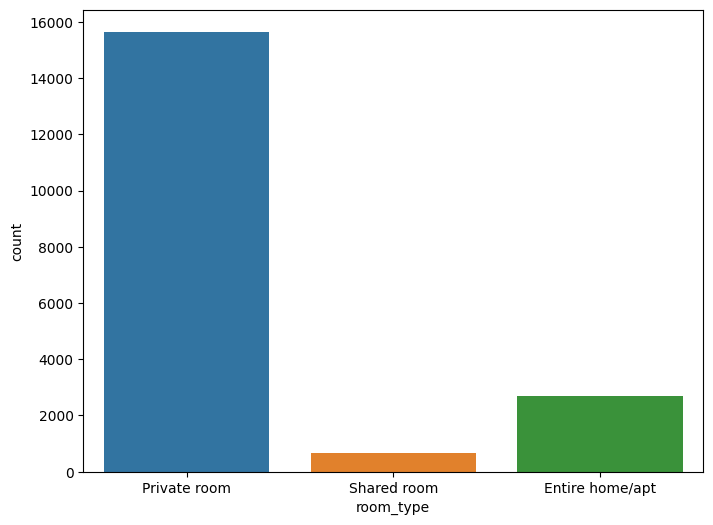

In [58]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["room_type"])

plt.show() 

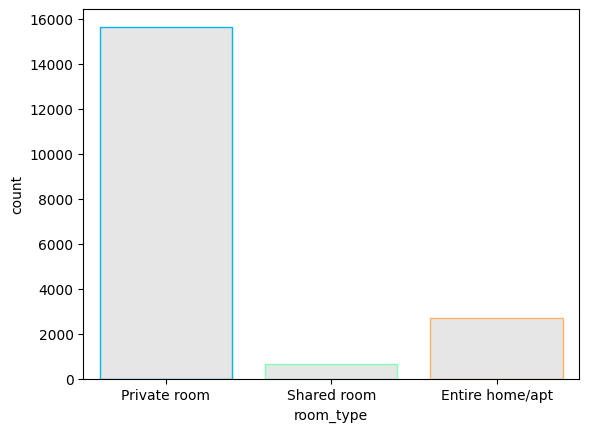

In [59]:
# El número dentro del color_palette se utiliza para elegir el número de colores
sns.countplot(x         = df["room_type"],
              facecolor = (0.9, 0.9, 0.9),
              linewidth = 1,
              edgecolor = sns.color_palette("rainbow", 3))
plt.show()

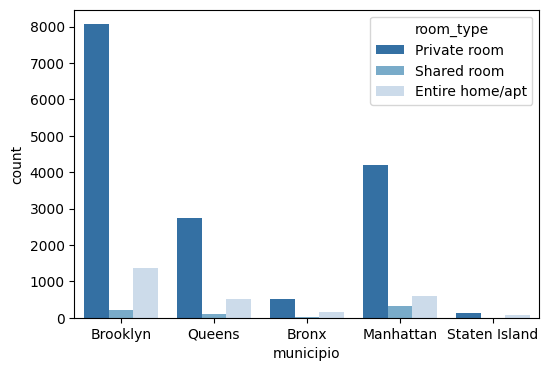

In [60]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "municipio", hue = "room_type", data = df, palette = "Blues_r")
plt.show()

### Histogramas

**`sns.histplot()`**

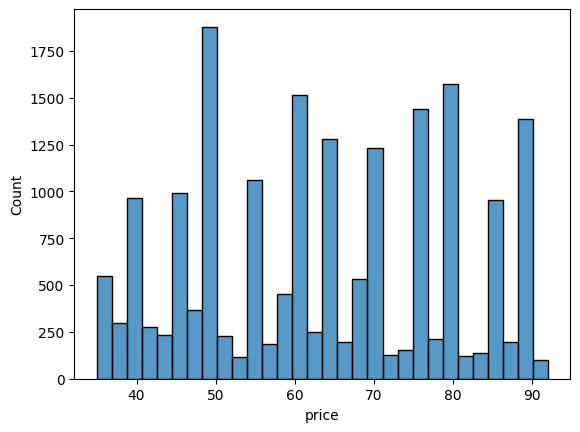

In [71]:
sns.histplot(df["price"])
plt.show()

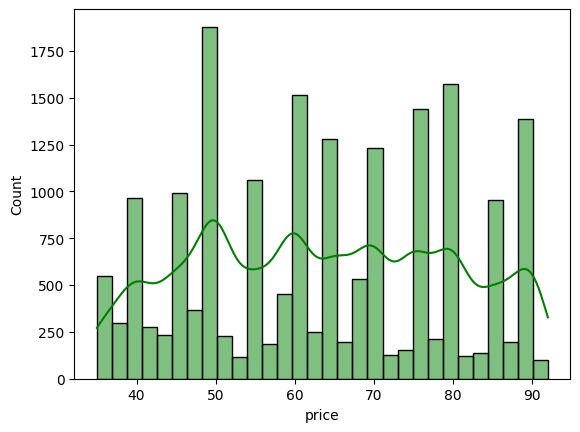

In [72]:
sns.histplot(df["price"], color = "green", kde = True)
plt.show()

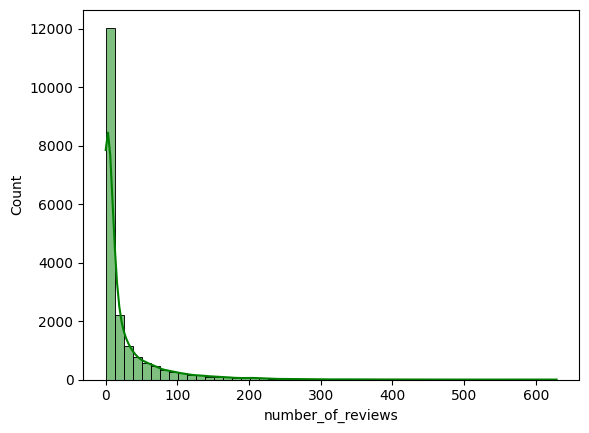

In [77]:
sns.histplot(df["number_of_reviews"], color = "green", bins = 50, kde=True)
plt.show()

### Scatter Plots (graficos de dispersión) 
**`sns.scatterplot()`**

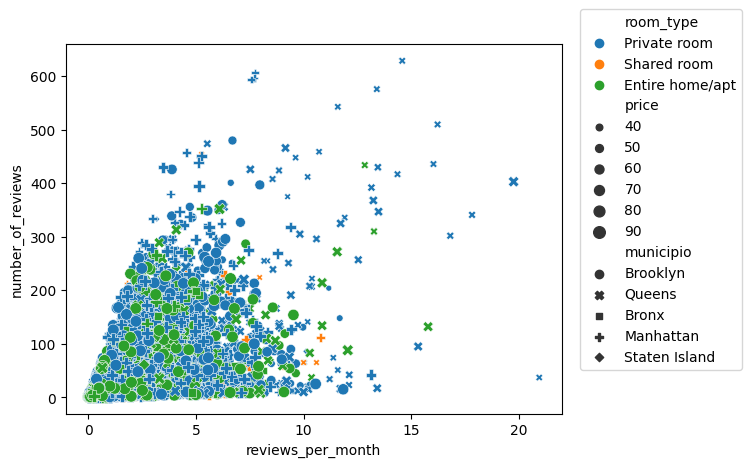

In [96]:
sns.scatterplot(
                data  = df.dropna(),
                x     = "reviews_per_month", 
                y     = "number_of_reviews", 
                hue   = 'room_type',
                style = 'municipio',
                size  = 'price'
        
           )
plt.legend(loc='lower center', bbox_to_anchor = (1.2,0.1))
plt.show()

In [101]:
df[['reviews_per_month','number_of_reviews']].dropna().sort_values('number_of_reviews', ascending=True).head(40)

,reviews_per_month,number_of_reviews
43153,0.32,1.0
19818,0.03,1.0
37372,0.13,1.0
25494,0.04,1.0
9248,0.02,1.0
28126,0.05,1.0
45288,0.56,1.0
27950,0.06,1.0
42694,0.77,1.0
39790,0.16,1.0


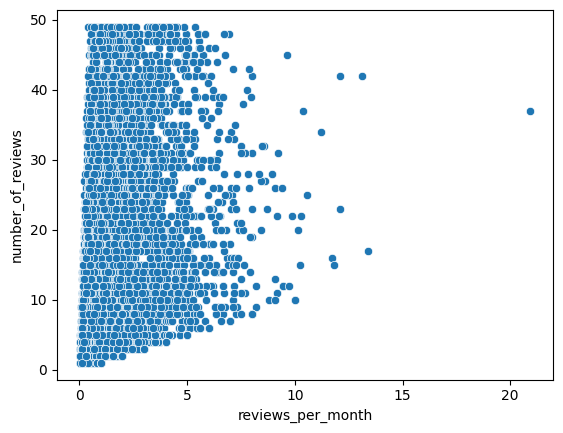

In [79]:
sns.scatterplot(x = df[df["number_of_reviews"] < 50].reviews_per_month,
                y = df[df["number_of_reviews"] < 50].number_of_reviews)

plt.show()

### Joint Plots
**`sns.jointplot()`**

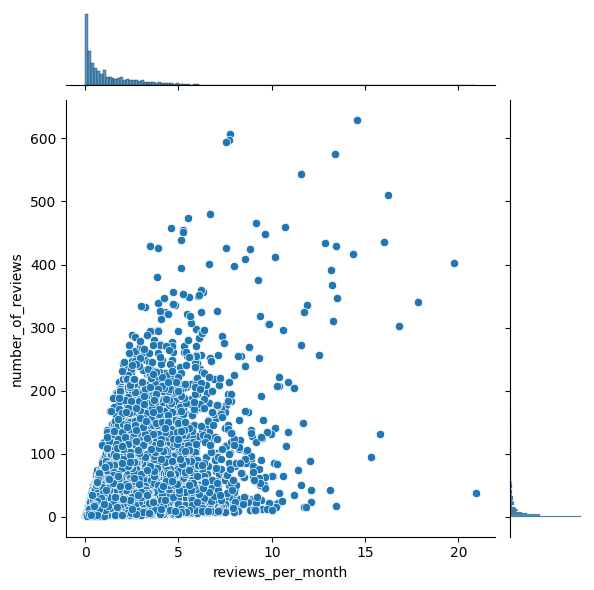

In [102]:
sns.jointplot(x = df["reviews_per_month"], y = df["number_of_reviews"])
plt.show()

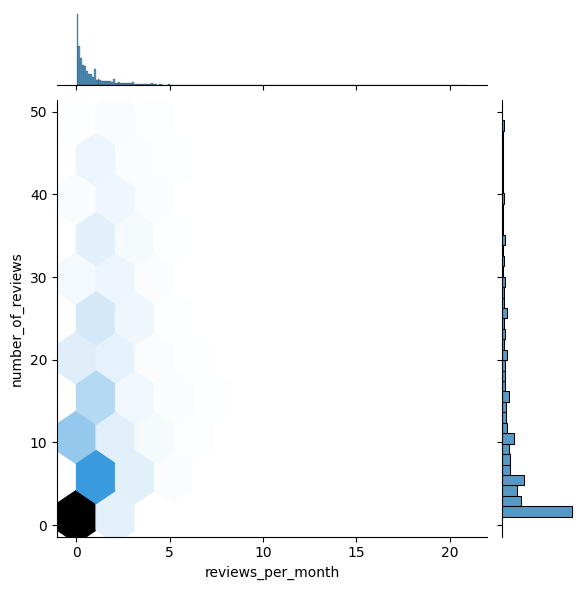

In [103]:
sns.jointplot(x = df[df["number_of_reviews"] < 50].reviews_per_month,
              y = df[df["number_of_reviews"] < 50].number_of_reviews,
              kind = "hex",
              gridsize = 10)

plt.show()

### sns.kdeplot()

**`Kernel Density Estimate (KDE)`** nos permite estimar la función de densidad de probabilidad de la curva continua (o no paramétrica) de nuestro conjunto de datos en una o más dimensiones.

En otras palabras, es un método para la visualización de las distribución de los **patrones** u **observaciones** del dataset, es análogo a un histograma.

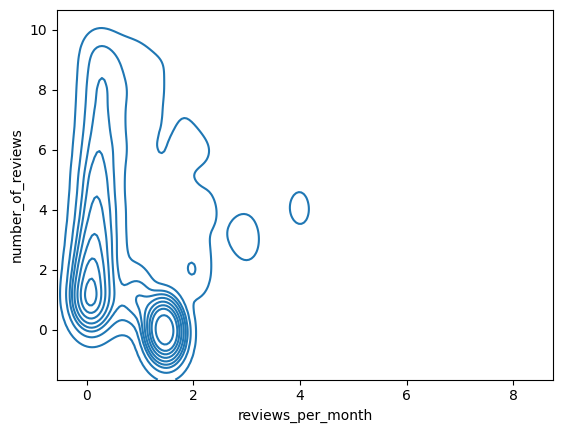

In [104]:
df["reviews_per_month"].replace({np.nan : df["reviews_per_month"].mean()}, inplace = True)

sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews)
plt.show()

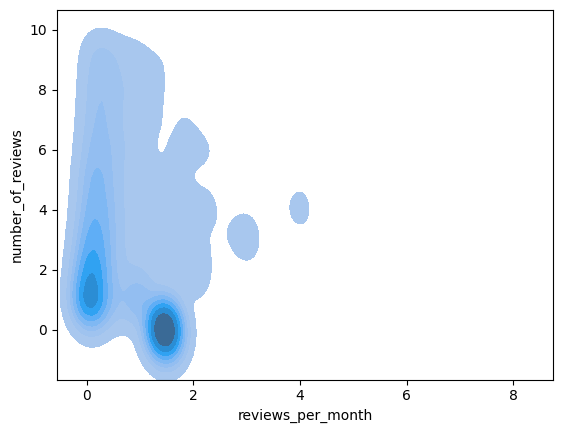

In [106]:
sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews,
           shade = True, 
           n_levels = 9)
plt.show()

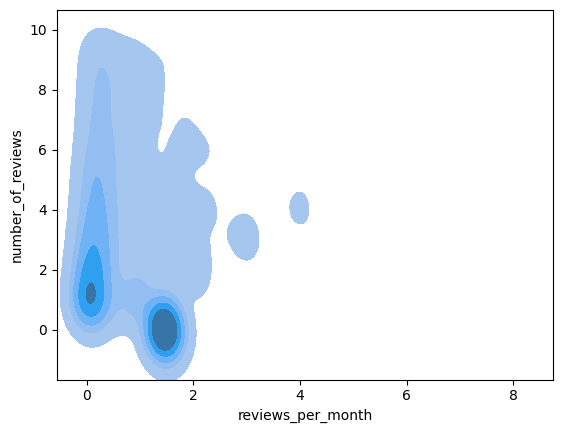

In [107]:
sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews,
           shade = True, 
           n_levels = 6)
plt.show()

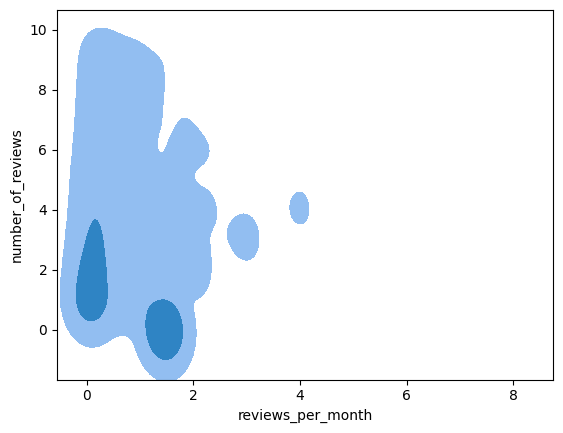

In [108]:
sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews,
           shade = True, 
           n_levels = 3)
plt.show()

### sns.boxplot() y sns.violinplot()

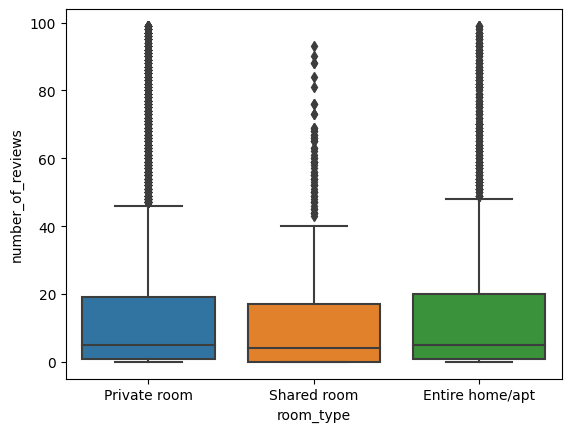

In [109]:
sns.boxplot(x = df["room_type"],
            y = df[df["number_of_reviews"] < 100].number_of_reviews)

plt.show()

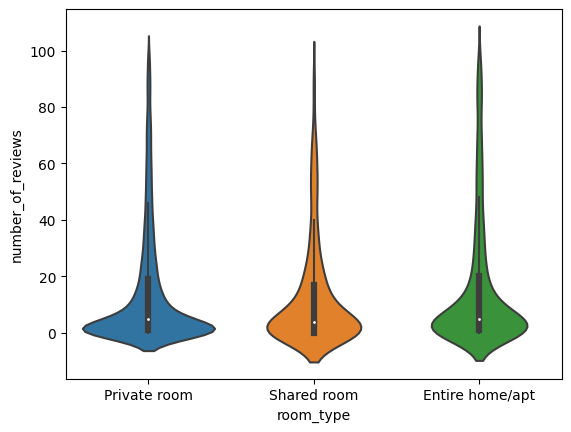

In [110]:
sns.violinplot(x = df.room_type,
               y = df[df["number_of_reviews"] < 100].number_of_reviews)

plt.show()

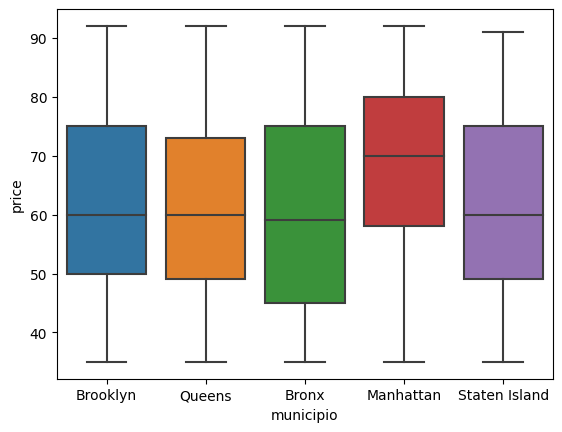

In [111]:
sns.boxplot(x = "municipio", y = "price", data = df)
plt.show()

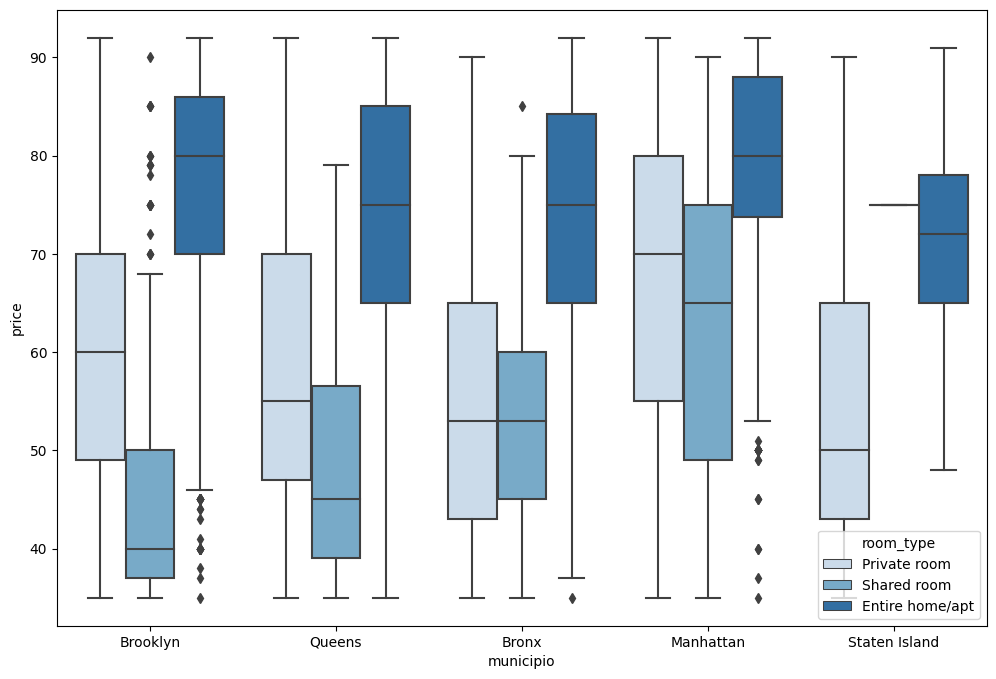

In [113]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "municipio",
            y = "price",
            hue = "room_type",
            data = df[df["price"] < 210],
            palette = "Blues")
plt.show()

In [114]:
df[(df['municipio']=='Staten Island') & (df['room_type']=='Shared room')]

,host_id,municipio,number_of_reviews,reviews_per_month,price,room_type
35265,50756378,Staten Island,1.0,0.100000,75.0,Shared room
35268,50756378,Staten Island,0.0,1.462218,75.0,Shared room


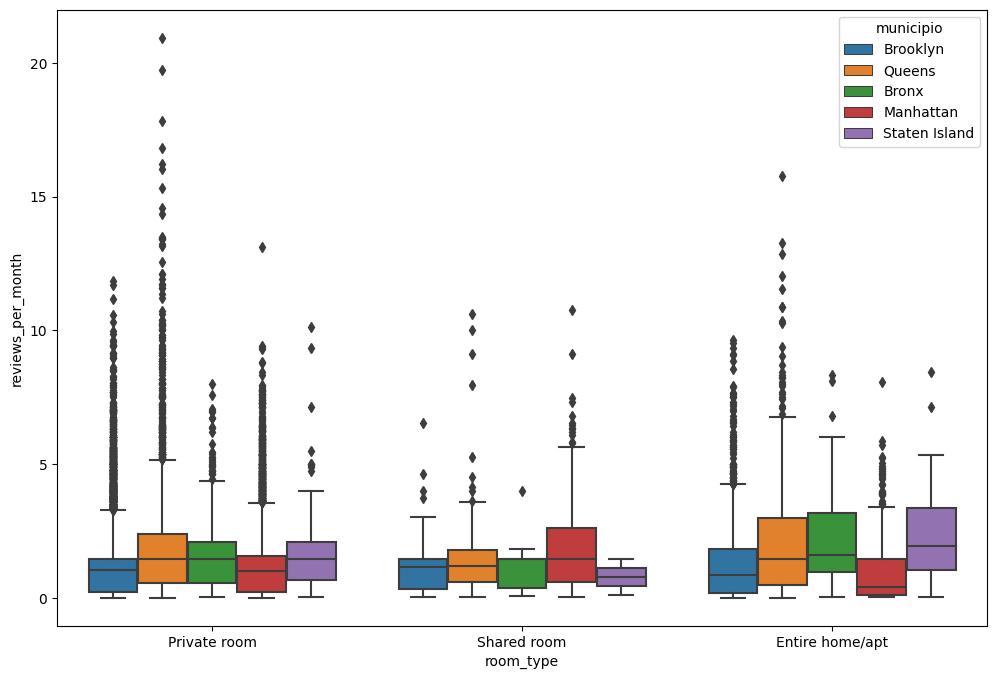

In [115]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "room_type",
            y = "reviews_per_month",
            hue = "municipio",
            data = df)

plt.show()

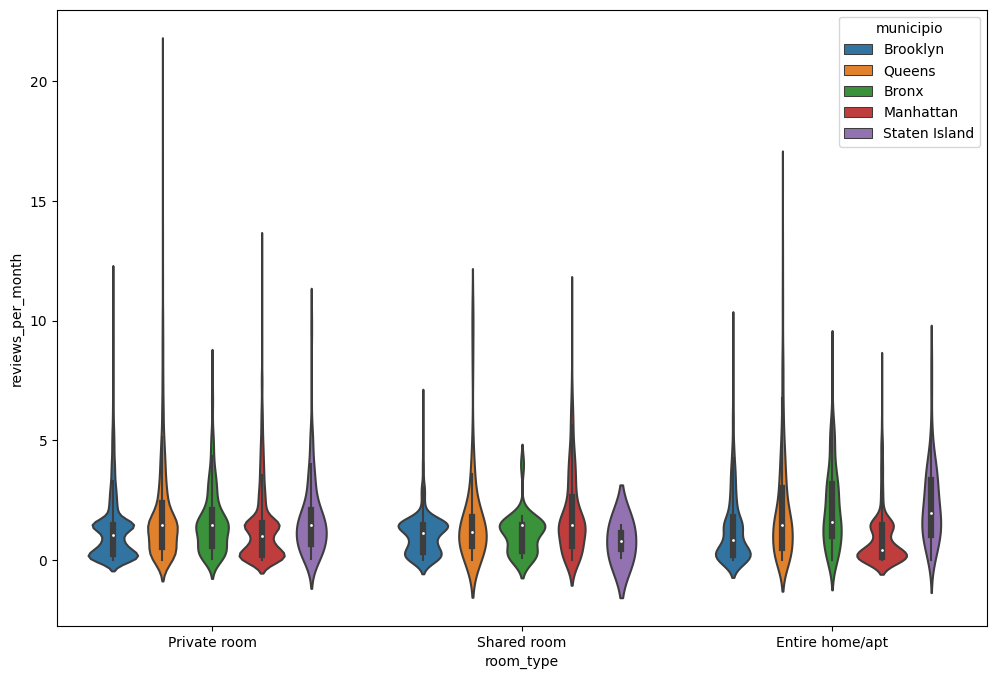

In [116]:
plt.subplots(figsize = (12, 8))

sns.violinplot(x = "room_type",
            y = "reviews_per_month",
            hue = "municipio",
            data = df)

plt.show()

### sns.heatmap()

Mapas de calor.

In [117]:
df[["number_of_reviews", "reviews_per_month", "price"]].corr()

,number_of_reviews,reviews_per_month,price
number_of_reviews,1.000000,0.564548,0.052862
reviews_per_month,0.564548,1.000000,0.010391
price,0.052862,0.010391,1.000000


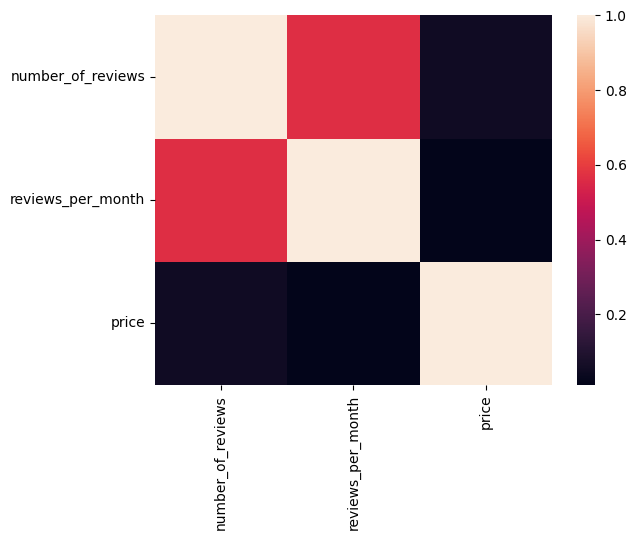

In [118]:
sns.heatmap(data = df[["number_of_reviews", "reviews_per_month", "price"]].corr())
plt.show()

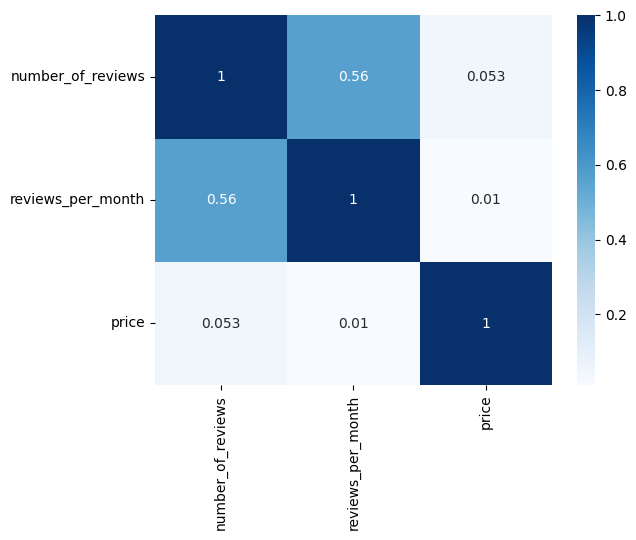

In [119]:
sns.heatmap(data = df[["number_of_reviews", "reviews_per_month", "price"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

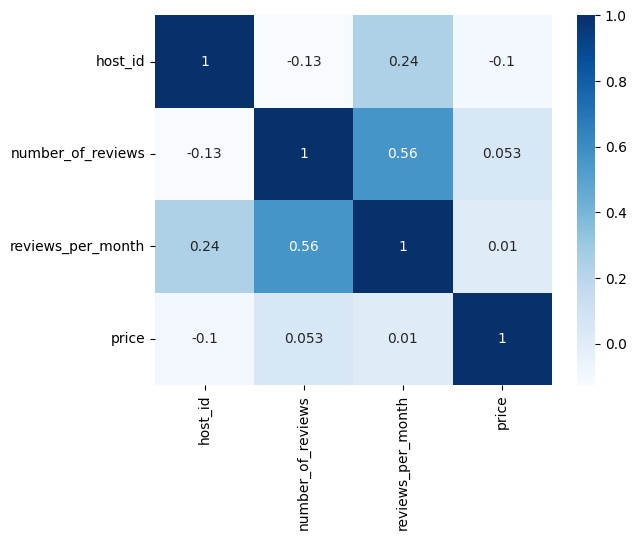

In [120]:
sns.heatmap(data = df.corr(),
            annot = True,
            cmap = "Blues")
plt.show()

### FacetGrid()

**`sns.FacetGrid()`** genera una matriz de graficas filtrando por las columnas y filas del DataFrame y aplicando una misma grafica a toda la matriz.

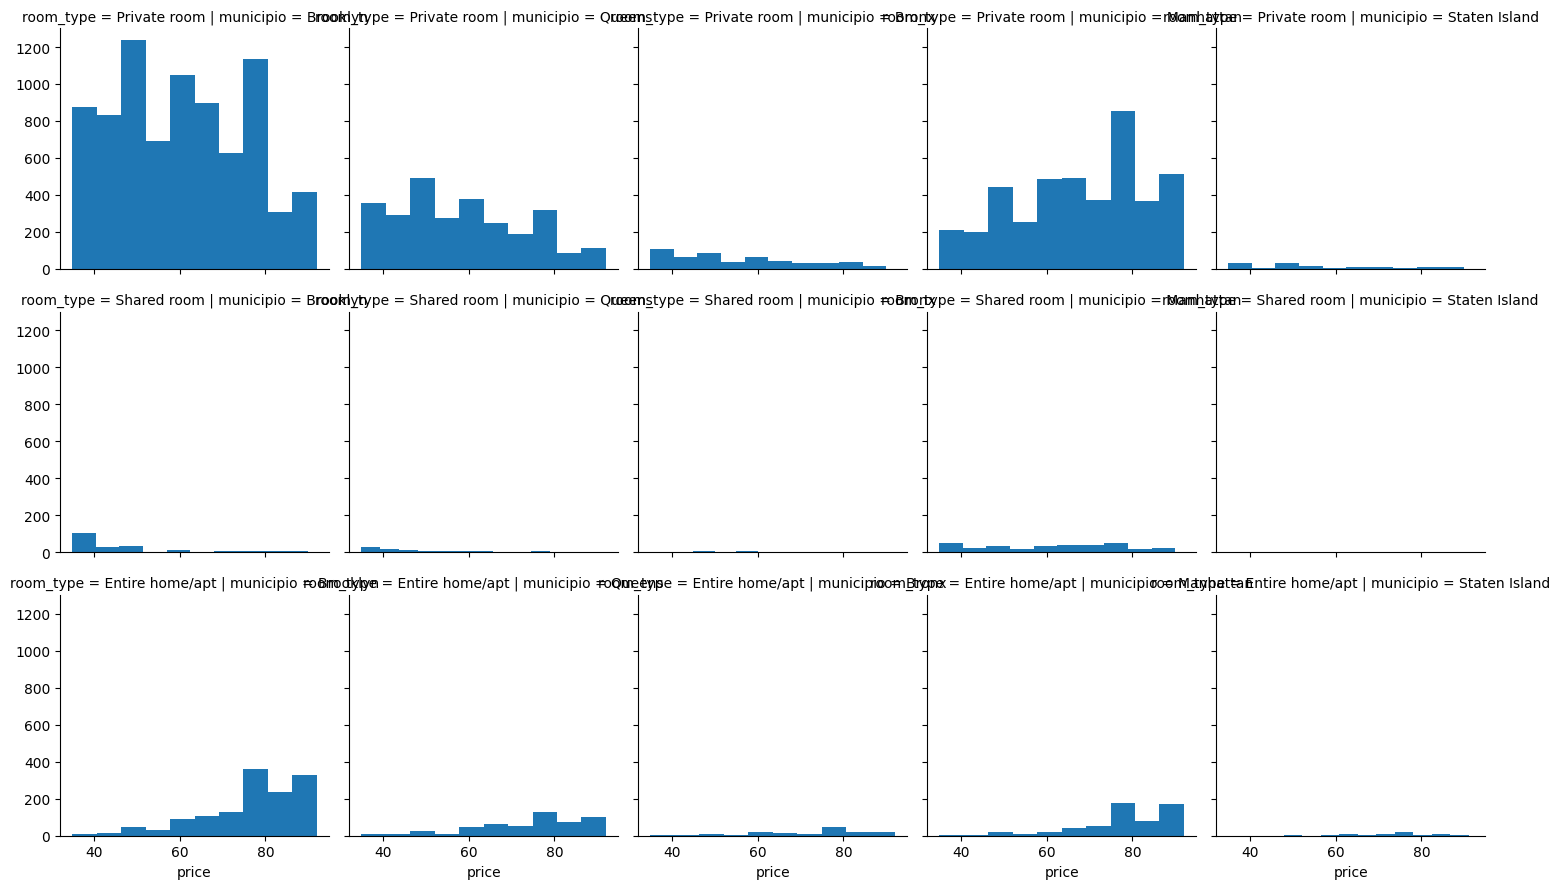

In [122]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(plt.hist, "price")
plt.show()

C:\Users\botic\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


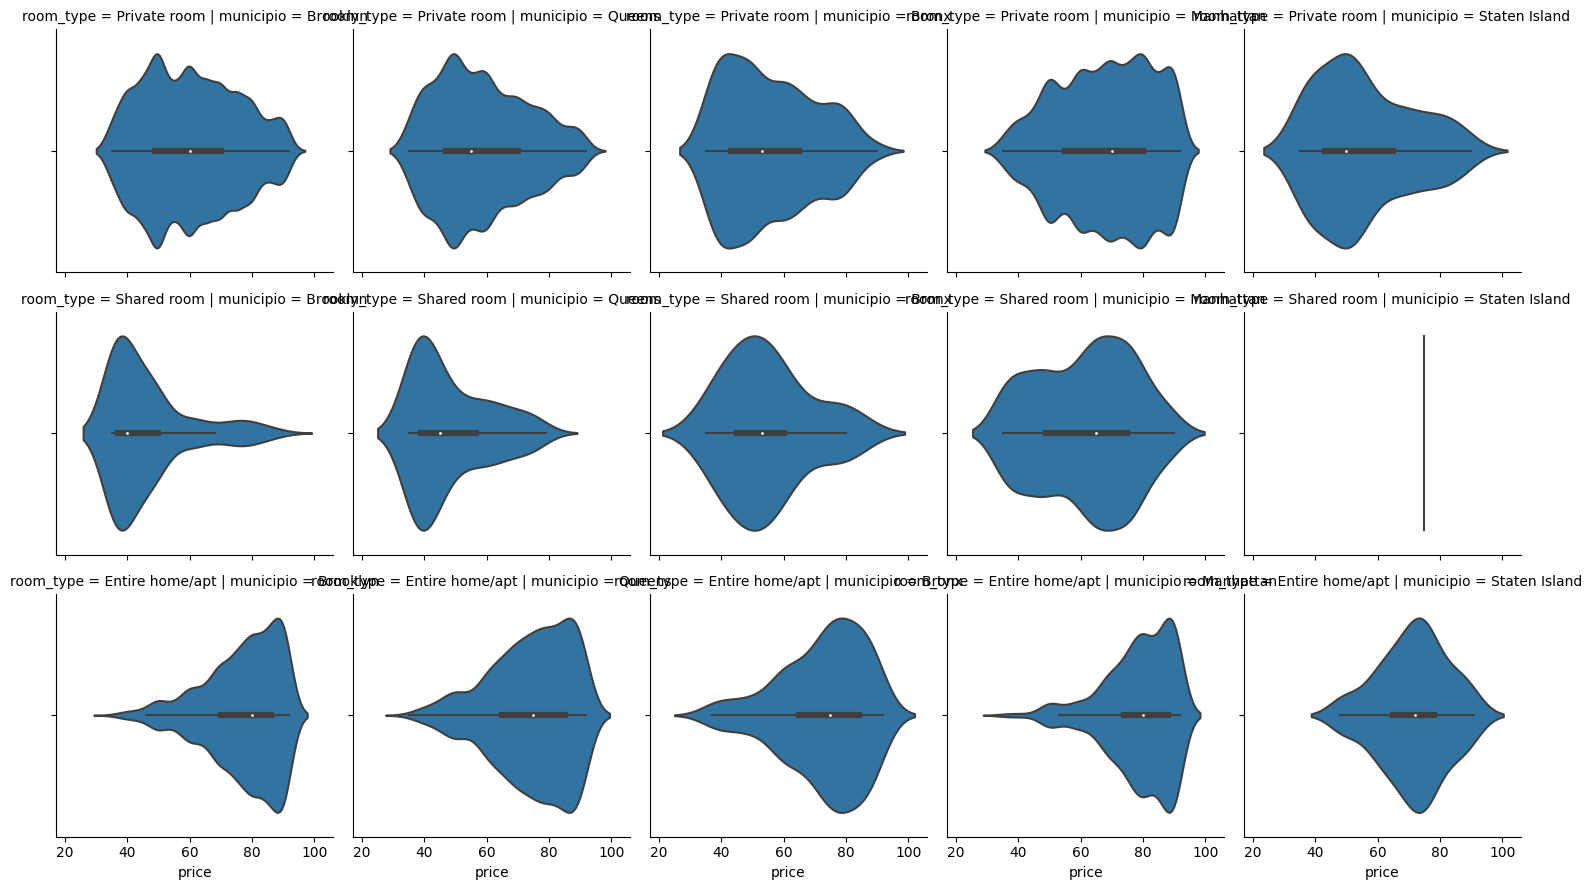

In [124]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(sns.violinplot, "price")
plt.show()

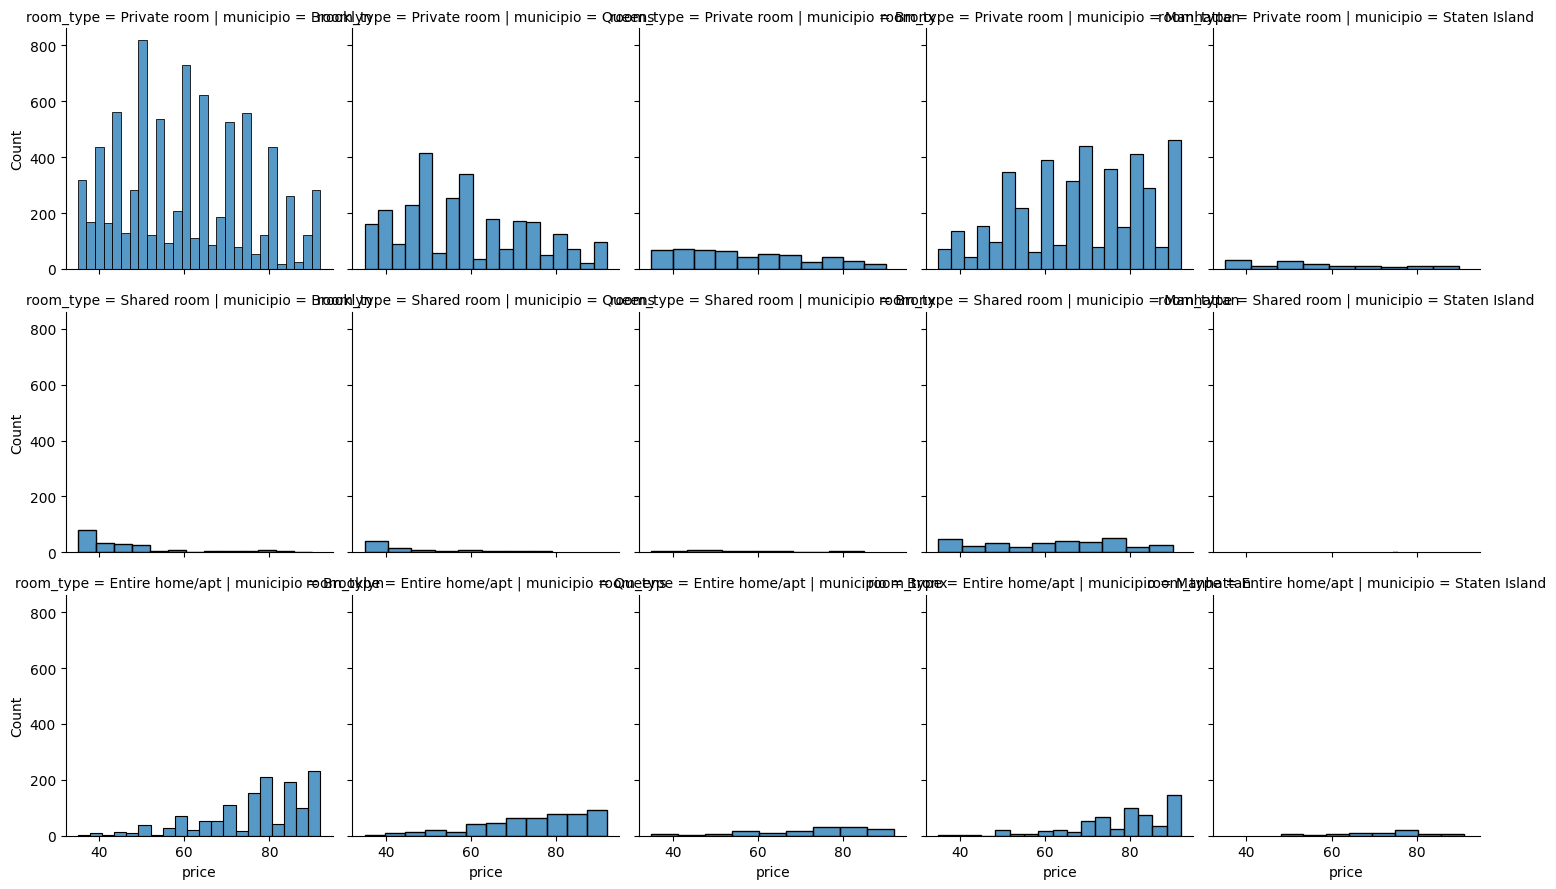

In [125]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(sns.histplot, "price")
plt.show()

### Otros Plots

[0.         1.57079633 3.14159265 4.71238898]


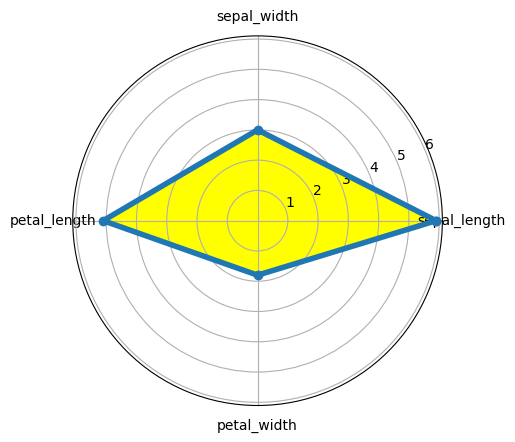

In [126]:
labels = np.array(iris.columns[:-1])

pattern = iris.iloc[149, :-1]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
print(angles)

# Esto es para añadir el último lado del polígono:
pattern = np.concatenate((pattern, [pattern[0]]))
angles = np.concatenate((angles, [angles[0]]))


fig = plt.figure()
ax = fig.add_subplot(polar = True)

ax.plot(angles, pattern, "o-", linewidth = 4)           # Lineas en azul
ax.fill(angles, pattern, alpha = 1, color = "yellow")   # Relleno amarillo
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla

plt.show()

In [163]:
columnas = ['nombre','adaptabilidad', 'extrovertido', 'nivel_de_strees', 'trabajo_en_equipo', 'puntualidad']
users = [['kike', 75, 80, 50, 75, 95],
        ['nole', 60, 90, 80, 55, 60]
        ]
df = pd.DataFrame(users, columns=columnas)
df

,nombre,adaptabilidad,extrovertido,nivel_de_strees,trabajo_en_equipo,puntualidad
0,kike,75,80,50,75,95
1,nole,60,90,80,55,60


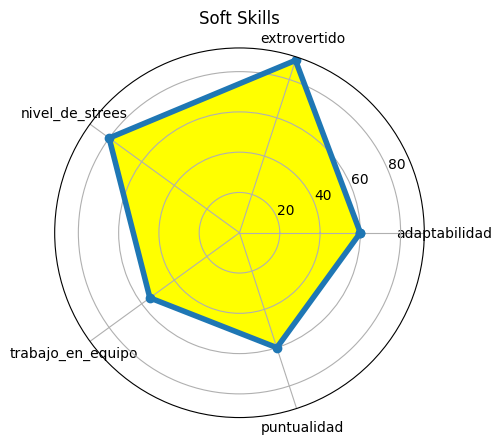

In [173]:
labels = np.array(df.columns[1:])

pattern = df.iloc[1, 1:]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
#print(angles)

# Esto es para añadir el último lado del polígono:
pattern = np.concatenate((pattern, [pattern[0]]))
angles = np.concatenate((angles, [angles[0]]))


fig = plt.figure()
ax = fig.add_subplot(polar = True)

ax.plot(angles, pattern, "o-", linewidth = 4)           # Lineas en azul
ax.fill(angles, pattern, alpha = 1, color = "yellow")   # Relleno amarillo
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla
plt.title('Soft Skills')
plt.show()

In [ ]:
sns.

In [ ]:
################################################################################################################################